# Introduction

## Goals

By the end of this course, you should be able to
- Do basic data analysis using R or Python/Pandas, with a special emphasis on
  - triton, or other similar HPC cluster environments
  - workflows, I/O strategies etc. that work on HPC clusters.

What this course is NOT:
- A basic course in programming. We don't expect you to have prior knowledge of R or Python, but some programming experience is required.
- A basic course in statistics / machine learning. As part of the course we'll do some simple stuff, but we expect that you either understand the statistics from before or learn it on your own.

Topics that we're going to cover on the R part of the course:
- The modern Tinyverse approach to easy data analysis.
- The tibble data structure, and how it relates to other common data structures.
- Verbs, maps and pipes that you can use to organize and modify your data. 
- Visualizing your results with ggplot2.
- CSV / feather data handling
- Some advanced Base-R tricks and functions from the apply-family.

## Note about syntax

Anything written like `this` refers to R-code. Depending on context it might be a type or a function.


## R as a language

R is nowadays one of the most popular data science languages. [1](http://r4stats.com/articles/popularity/) 

In Stack Overflow it is the 7th most popular language and neck to neck with C. [2](https://stackoverflow.blog/2017/10/10/impressive-growth-r/)

Compared to its older competitors like SPSS or SAS it is way more usable, but it is not as generic as e.g. Python.

So use R for what it has been designed for - data analysis.

Nowadays there are three popular styles of doing data analysis in R:
1. **Base R** - using objects (`vector`,`list`,`factor`,`data.frame`), functions (`apply`) and operators (`[ ]`,`[[ ]]`) of the base R packages
2. **Tidyverse** - using objects (`tibble`), functions (`filter`,`select`,`mutate`,`map`) and operators (`%>%`) from [Tidyverse](https://www.tidyverse.org/) collection of packages.
3. **data.table** - using objects (`data.table`), functions (`set`) and operators (`[ ] `) of [data.table](http://r-datatable.com/) in conjunction with previous packages. 

Base R can is (at least in my opinion) similar to Matlab/Fortran in its style. It is very permissive which enables very good solutions, but also very bad solutions.

Tidyverse is centered around the idea of certain base operations and code structures that are most frequent in data analysis. By making those structures easily readable and understandable it is easy to generate efficient code. We'll be doing this quite a bit here.

data.table is an extension to base R's `data.frame`, but the syntax and underlying properties are written in a way that it can handle huge (up and beyond your RAM) datasets. We'll look a bit into it, but if you at some point need to work with big data, do remember that it exists.

## Packages

R has a wide variety of libraries supplied in the R-CRAN-network (Comprehensive R Archive Network). Installing these libraries is usually as simple as running:

`install.package("packagename")`

Loading these libraries is done with:

`library(packagename)`

In this course we will be using packages from R [Tidyverse](https://www.tidyverse.org/).

## Imporant references

There's lots of good R material available free on the internet. I highly recommend [R for Data Science](http://r4ds.had.co.nz/) and [Efficient R programming](https://csgillespie.github.io/efficientR/).

When it comes to stuff related to the Tidyverse, the best options are googling or going to [its webpage](https://www.tidyverse.org/) and clicking on the honeycomb structure to get information on packages that supply the extensions.

Good keywords when searching information in the internet are:
- "tidyverse" for tidyverse packages as a whole
- "dplyr" for verbs that we'll be using
- "ggplot2" for the versatile plotting library
- "tibble" to get information on the `data.frame` extension
- "purrr" for mapping functions that can be used to run functions on the data
- "tidyr" for reshaping the data
- "readr" for data reading functions

Usually something like "R *keyword i want to do this*" gives a good answer from stackoverflow etc.

# Let's get started

## Simple example

Let's load up the Tidyverse and analyze dataset `movies` from package `ggplot2movies` that has [IMDB](https://www.imdb.com) data from some 60,000 movies.

In [7]:
library(tidyverse)

data('movies',package='ggplot2movies')

head(movies)
ncol(movies)
nrow(movies)
str(movies)

is.tibble(movies)

Warning message:
“replacing previous import by ‘tidyr::%>%’ when loading ‘broom’”Warning message:
“replacing previous import by ‘tidyr::gather’ when loading ‘broom’”Warning message:
“replacing previous import by ‘tidyr::spread’ when loading ‘broom’”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,⋯,4.5,4.5,,0,0,1,1,0,0,0
$1000 a Touchdown,1939,71,NA,6.0,20,0.0,14.5,4.5,24.5,⋯,4.5,14.5,,0,0,1,0,0,0,0
$21 a Day Once a Month,1941,7,NA,8.2,5,0.0,0.0,0.0,0.0,⋯,24.5,24.5,,0,1,0,0,0,0,1
"$40,000",1996,70,NA,8.2,6,14.5,0.0,0.0,0.0,⋯,34.5,45.5,,0,0,1,0,0,0,0
"$50,000 Climax Show, The",1975,71,NA,3.4,17,24.5,4.5,0.0,14.5,⋯,0.0,24.5,,0,0,0,0,0,0,0
$pent,2000,91,NA,4.3,45,4.5,4.5,4.5,14.5,⋯,14.5,14.5,,0,0,0,1,0,0,0


[1] 24

[1] 58788

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	58788 obs. of  24 variables:
 $ title      : chr  "$" "$1000 a Touchdown" "$21 a Day Once a Month" "$40,000" ...
 $ year       : int  1971 1939 1941 1996 1975 2000 2002 2002 1987 1917 ...
 $ length     : int  121 71 7 70 71 91 93 25 97 61 ...
 $ budget     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ rating     : num  6.4 6 8.2 8.2 3.4 4.3 5.3 6.7 6.6 6 ...
 $ votes      : int  348 20 5 6 17 45 200 24 18 51 ...
 $ r1         : num  4.5 0 0 14.5 24.5 4.5 4.5 4.5 4.5 4.5 ...
 $ r2         : num  4.5 14.5 0 0 4.5 4.5 0 4.5 4.5 0 ...
 $ r3         : num  4.5 4.5 0 0 0 4.5 4.5 4.5 4.5 4.5 ...
 $ r4         : num  4.5 24.5 0 0 14.5 14.5 4.5 4.5 0 4.5 ...
 $ r5         : num  14.5 14.5 0 0 14.5 14.5 24.5 4.5 0 4.5 ...
 $ r6         : num  24.5 14.5 24.5 0 4.5 14.5 24.5 14.5 0 44.5 ...
 $ r7         : num  24.5 14.5 0 0 0 4.5 14.5 14.5 34.5 14.5 ...
 $ r8         : num  14.5 4.5 44.5 0 0 4.5 4.5 14.5 14.5 4.5 ...
 $ r9         : num  4.5 4.5 24.5 34.5 0

[1] TRUE

Let's break the previous commands down:

- `data`-command can be used to load data from `package`
- `head` shows the first rows of data
- `ncol` and `nrow` can be used to get the number of columns and rows respectively 
- `str` (structure) shows a lot of information on how the data is structured
- `is.X` can be used to verify that the type of the object is `X`.

From the output of `str` you can see few things:
- The object `movies` is a `tbl` (`tibble`), which is an extension of `data.frame`.
- Each row of the `data.frame` is an *observation* while each *column* is a variable. This choice of which axis is an observation and which is variable is not arbitrary.
- Each column of the `data.frame` is a `vector` with defined type and length. 

I liked [The Matrix](http://www.imdb.com/title/tt0133093/), let's see if I was alone in my opinion.

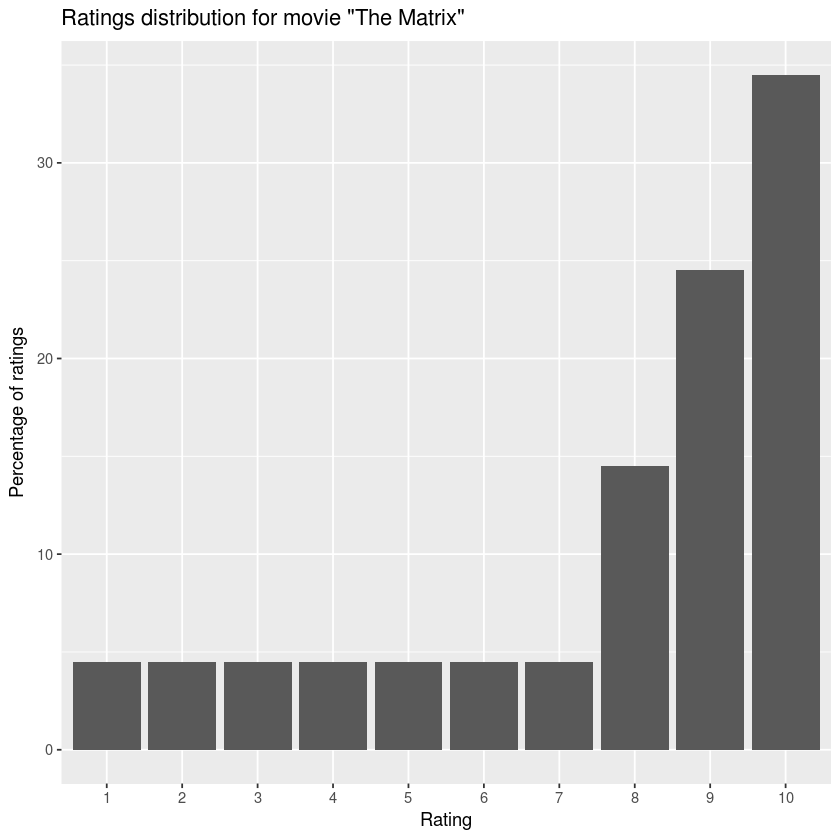

In [73]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10)) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    mutate(rating=factor(as.integer(rating))) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col() +
            ggtitle('Ratings distribution for movie "The Matrix"') +
            xlab('Rating') +
            ylab('Percentage of ratings')

Seems pretty popular.

There's a lot to unpack on in the example. Lets go through it one step at a time.

The Matrix had its title written as "Matrix, The" instead of "The Matrix". If you do not know the formatting used in the dataset you might want to find all movies with "Matrix" in the title.

To do this we need to use the `filter` function, `str_detect`-function and the pipe operator `%>%`.

In [9]:
# Find all movies with Matrix in the title
movies %>%
    filter(str_detect(title,'Matrix'))

title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
"Matrix Reloaded, The",2003,138,127000000,7.1,57225,4.5,4.5,4.5,4.5,⋯,14.5,14.5,R,1,0,0,0,0,0,0
"Matrix Revolutions, The",2003,125,110000000,6.3,40058,4.5,4.5,4.5,4.5,⋯,4.5,14.5,R,1,0,0,0,0,0,0
"Matrix, The",1999,136,63000000,8.5,143853,4.5,4.5,4.5,4.5,⋯,24.5,34.5,R,1,0,0,0,0,0,0
Sex Files: Sexual Matrix,1999,79,NA,3.2,52,24.5,4.5,14.5,14.5,⋯,4.5,4.5,R,0,0,0,1,0,0,0
That 70's Matrix,2001,35,1200,3.9,24,34.5,4.5,0.0,4.5,⋯,0.0,24.5,,1,0,1,0,0,0,1


Pipe `%>%` is used to minimize this kind of code:

```r
a <- data.frame(...)
a_tmp1 <- func1(a)
a_tmp2 <- func2(a_tmp1)
b <- func3(a_tmp2)
```

With `tibble` and `%>%` the previous code block would be

```r
a <- tibble(...)
b <- a %>% 
    func1() %>% 
    func2() %>%
    func3()
```

Basically the pipe-operator puts output from left side to the first argument of the function call on the right side.

In Tidyverse the functions `func1` etc. are called "verbs" and they return a `tibble` as their output. Thus the object type of input and output are the same and the pipe can be chained across multiple calls. The pipe structure works with other functions as well, but with Tidyverse verbs you can be certain that the object does not change along the way.

Using the pipe produces code that has the data pipeline clearly visible.

Here we used the `filter`-verb to filter data based on data's values. The argument it takes is a logical statement about some column or as it is this case, a function call that checks whether "Matrix" can be found in column "title". (See e.g. this blog post for various filter possibilites [[1]](https://data-se.netlify.com/2016/12/21/dplyr_filter/))

Now that we know the exact title let's pick it.

In [14]:
# Pick the 'Matrix, The'
movies %>%
    filter(title == 'Matrix, The')

title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
"Matrix, The",1999,136,63000000,8.5,143853,4.5,4.5,4.5,4.5,⋯,24.5,34.5,R,1,0,0,0,0,0,0


The rating vote percentages are stored in columns `r1` to `r10`. Let's use verb `select` to select columns based on their names.

In [18]:
# Get rating distribution for 'Matrix,The'

movies %>%
    filter(title == 'Matrix, The') %>%
    select(r1,r2,r3,r4,r5,r6,r7,r8,r9,r10)

r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
4.5,4.5,4.5,4.5,4.5,4.5,4.5,14.5,24.5,34.5


This is a bit too much manual labor so lets use function `num_range` from [select_helpers](http://dplyr.tidyverse.org/reference/select_helpers.html) to choose all rows starting with "r" and having a number from range `1:10` at the end. 

In [28]:
# Get rating distribution in a more usable fashion
movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10))

r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
4.5,4.5,4.5,4.5,4.5,4.5,4.5,14.5,24.5,34.5


Now we got what we want to plot, but the data is in a wrong ordering. Remember that columns were meant to be variables and rows were meant to be observations (in plot language: column y should have y-values for plot, column x should have x-values).

To achieve this we can use `gather`-function from tidyr-package. [[1]](http://tidyr.tidyverse.org/reference/gather.html)

`gather` can be used to take columns and their values and store them to key-value pairs. 

By settings `factor_key=T` the column names are stored as a `factor`. `factor` stores a mapping between strings and integers and then represents the data as a `vector` of integer. So basically `r1` is `1`, `r2`,`2`, etc. This preserves the ordering. `factor`s are useful for string data that can be ordered or categorized (identical strings have same `integer` mapped to them).

In [74]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10)) %>%
    gather(key='rating',value='percentage',factor_key=T)

rating,percentage
r1,4.5
r2,4.5
r3,4.5
r4,4.5
r5,4.5
r6,4.5
r7,4.5
r8,14.5
r9,24.5
r10,34.5


Now we want to plot the result. To do this let's use functions from ggplot2.

`ggplot2` function can be used to create a figure. It takes as its argument an `aes` or aesthetic mapping that defines which columns are mapped to which axes.

After specifying the figure one can use calls to various ggplot2-functions to add plots or properties to the figure.
`+`-operator is used to sum all of these together.

In this case let's use `geom_col` to create a bar plot. It sets bars heights based on data values. [[1]](http://ggplot2.tidyverse.org/reference/geom_bar.html)


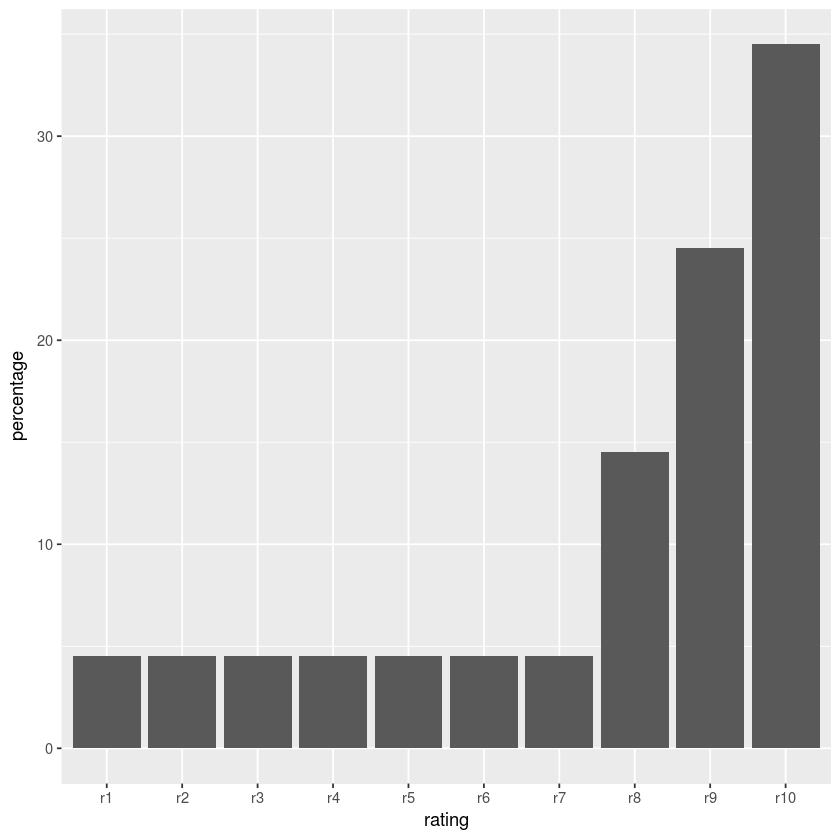

In [78]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10)) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col()

This plot is already something, but we can make it more beautiful. Let's change the ratings from `r1` to `1` etc.. As rating-variable is a `factor` (basically a `vector` of integers), we can use `mutate`-verb with `as.integer` to make the conversion.

`mutate` can be used to create new variables or to modify existing ones. It keeps rest of the variables intact. `transmute` would drop rest of the variables. [[1]](http://dplyr.tidyverse.org/reference/mutate.html)

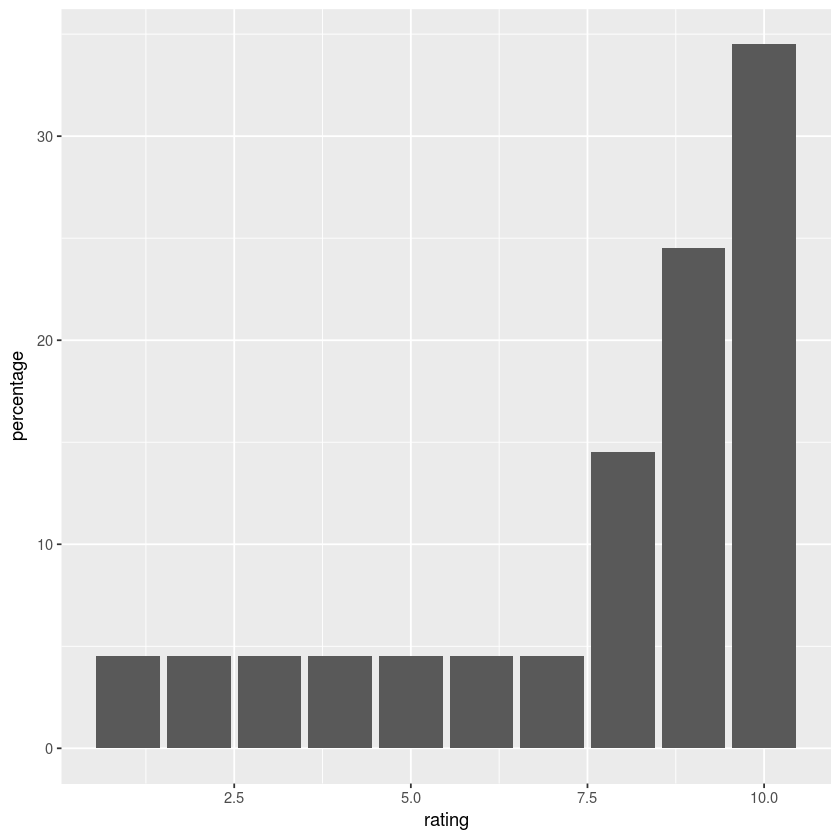

In [82]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10)) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    mutate(rating=as.integer(rating)) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col()

This worked, but now the x-axis looks bad. Lets convert the rating to `factor` so that x-axis is strings instead of integers.

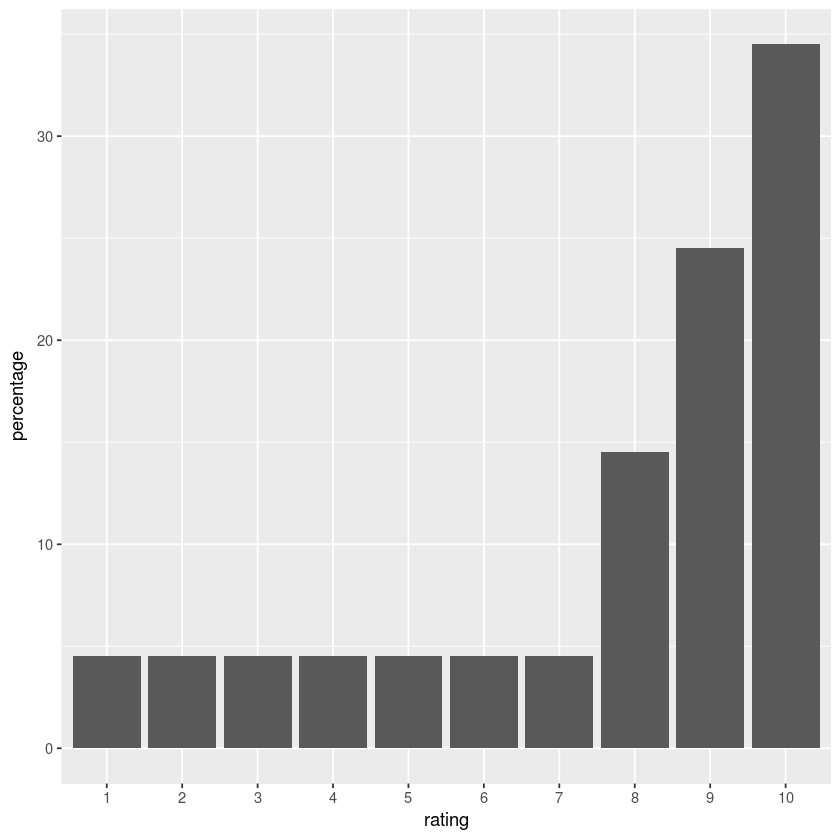

In [83]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10)) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    mutate(rating=factor(as.integer(rating))) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col()

Great. Lets finish the job by specifying axis labels with `xlab` and  `ylab` and specifying title with `ggtitle`. [[1]](http://ggplot2.tidyverse.org/reference/labs.html)

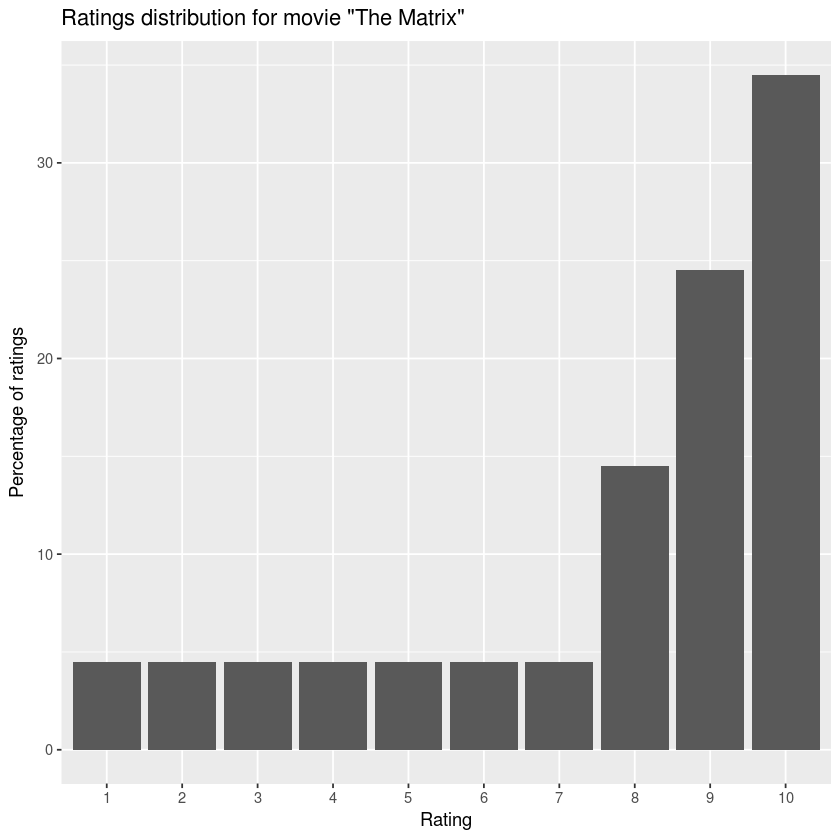

In [88]:
movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10)) %>%
    gather(key='rating',value='percentage',factor_key=T) %>%
    mutate(rating=factor(as.integer(rating))) %>%
    ggplot(aes(x=rating,y=percentage)) +
            geom_col() +
            ggtitle('Ratings distribution for movie "The Matrix"') +
            xlab('Rating') +
            ylab('Percentage of ratings')

This looks nice. With small additions one can even plot the whole trilogy.

Here:
1. Movies were chosen based on whether both "Matrix" and "The" were present in title.
2. Columns year and title were included with the select-statement.
3. Title and year were excluded from column gathering with `-title` and `-year`.
4. In `aes`-mapping the `fill` keyword was used to specify the fill colour names. By using `reorder` the titles were re-ordered based on publishing year.
5. x-, y- and fill-labels were set using `labs`-function.


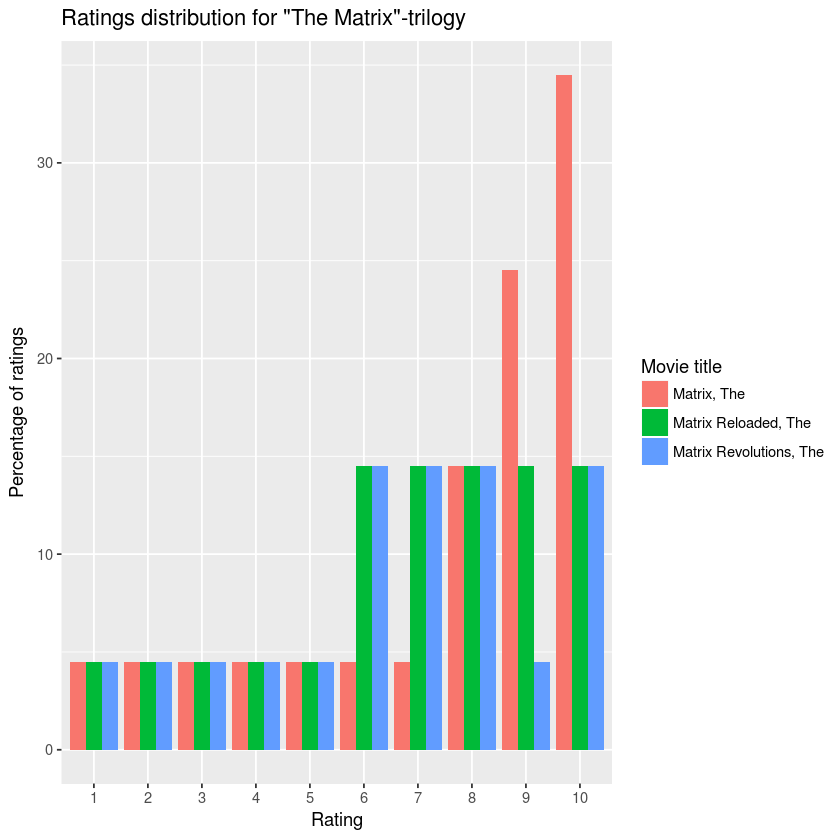

In [126]:
movies %>%
    filter(str_detect(title,'Matrix') & str_detect(title,'The')) %>%
    select(num_range('r',1:10),title,year) %>%
    gather(key='rating',value='percentage',-title,-year,factor_key=T) %>%
    mutate(rating=factor(as.integer(rating))) %>%
    ggplot(aes(x=rating,y=percentage,fill=reorder(title,year))) +
            geom_col(position='dodge') +
            ggtitle('Ratings distribution for "The Matrix"-trilogy') +
            labs(x='Rating',y='Percentage of ratings',fill='Movie title')

rating
8.5


# A tibble: 1 x 10
     r1    r2    r3    r4    r5    r6    r7    r8    r9   r10
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1  4.50  4.50  4.50  4.50  4.50  4.50  4.50  14.5  24.5  34.5
# A tibble: 10 x 2
   Rating Percentage
   <fct>       <dbl>
 1 r1           4.50
 2 r2           4.50
 3 r3           4.50
 4 r4           4.50
 5 r5           4.50
 6 r6           4.50
 7 r7           4.50
 8 r8          14.5 
 9 r9          24.5 
10 r10         34.5 


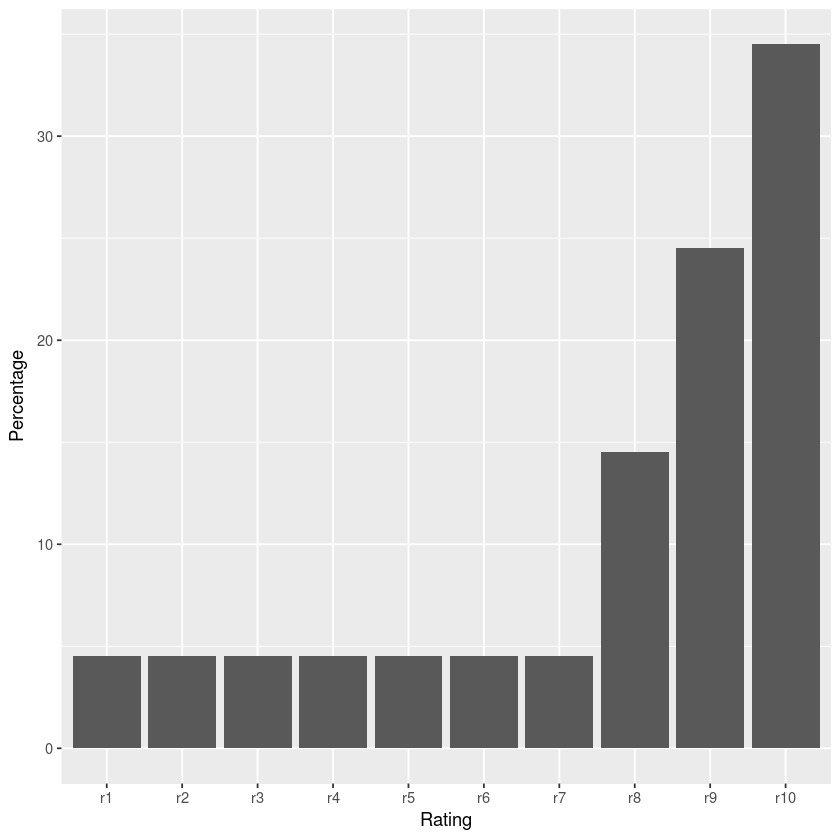

In [25]:

# Check the rating
the_matrix %>%
    select(rating)

# Get rating distribution for 'Matrix,The'

the_matrix_ratings <- movies %>%
    filter(title == 'Matrix, The') %>%
    select(num_range('r',1:10))

print(the_matrix_ratings)

# Now we want to make r1-r10 into observations i.e. turn columns into rows

the_matrix_ratings <- the_matrix_ratings %>%
    gather(key='Rating',value='Percentage',factor_key=T)

print(the_matrix_ratings)

# Now lets plot the ratings as a bar chart

the_matrix_ratings %>%
    ggplot(aes(x=Rating,y=Percentage)) +
        geom_bar(stat='identity')

## Data types and variables

In R for the most of your time your data will be of the following types:
- `logical`is a boolean value with values `TRUE` OR `FALSE`.
- `int`/`integer` is a integer number. It is differentiated from generic numbers with an `L`-letter in the end. E.g. `3L`.
- `num`/`numeric`/`double` is a generic floating point number.
- `complex` refers to complex point numbers. One can specify them in the form `4 + 17i`.
- `chr`/`character` refers both to individual characters and character strings.

Data type of an object can be found with `typeof`-function.

Variables in R are set with the assignment operator `<-`. `print`-function prints variables.

In [ ]:
boolean_var <- FALSE
integer_var <- 73L
numeric_var <- 3.2
character_var <- 'Aalto'
complex_var <- 3+2i

typeof(boolean_var)
typeof(integer_var)
typeof(numeric_var)
typeof(character_var)
typeof(complex_var)

print(integer_var)

## Atomic vectors

R is a vectorized language. This means that most objects are `vector`-objects or built from `vector`s.

A atomic `vector` in R is a contiguous series of values where all values share a common data type. `vector`'s length is specified at its creation time.

To create a `vector` one can use the `vector`-function. It takes as its arguments the type and the length.

More often one uses the `c`-function (concatenate/combine) to combine data into a `vector`. When using this it is a good idea to make sure that types of the input data match or you will get a type conversion.

`str` (structure) can be used to get lots of readable information on vectors.

In [ ]:
# Initialization using the vector-function
integer_vector <- vector('integer',5)
str(integer_vector)

# A vector of integers (note the L-letters)
integers <- c(1L, 2L, 5L, 7L)
str(integers)

# A vector of floating point numbers
floats <- c(7.5, 28.1, 0.3, 3.4)
str(floats)

# A vector containting character strings
characters <- c('fox', 'lynx', 'tiger', 'cat')
str(characters)

# A vector of generic numbers (note that type is not integer)
not_integers <- c(1, 2, 5, 7)
str(not_integers)

# Output determined by highest type in hierarchy:
# logical < integer < double < complex < character
type_conversion_warning <- c(TRUE,1L,7.5,'fox',1)
str(type_conversion_warning)

### Vector indexing

Length of a `vector` can be obtained with function `length`.

`vector`s can be accessed by index using the `[start:finish]`-syntax, but typically one uses functions with `apply`-structures to access and modify them. More on that later.

One can also provide an indexing `vector` with the indices given as numbers. Indices in R start from 1.

In [ ]:
# Value at index 2
integers[2]
# Values from index 2 to the end
floats[2:length(floats)]
# Values from index 2 to one before the end
characters[2:(length(characters)-1)]
# Values at indices 2 and 4 (note indexing with a vector)
not_integers[c(2,4)]

Indexing with indices is quite rarely the way you want to access data as that forces you to keep track of data placement. More often you're interested in a certain range of data. For this you need logical indexing, where you create an indexing `vector` with a logical expression.

This indexing `vector` can then be used to slice the `vector`. Most of the time you don't need to store the indexing `vector`.

In [ ]:
# Create an indexing vector
indexing_vector <- integers > 3
# Result is a boolean vector with the same dimensions as the original vector 
print(indexing_vector)
# This indexing vector can be used to index the original vector
integers[indexing_vector]

# Same as a one-liner
integers[integers > 3]

### Performance alert: Changing vector's size slows code down

One can edit the `vector` and their values after they have been created, but one needs to be mindful of the operations.

Some operations (like changes in values) are done *in place*. This means that the memory values are changed, but there was no need to create a new `vector`. This type of operation is fast and does not require additional memory.

On the other hand some operations (like appending) change the `vector` length. This forces the creation of a new `vector`, into which values from the old object are copied. This type of operation slows the code down and requires additional memory.

In R it is usually best to reserve a `vector` of the size you will use first and populate it with values afterwards.

## Factors

`factor`s are a special case of `vector`s that are used to store character strings in a more efficient way. This is especially important with data that can be split into categories.

In a `factor` each unique string in a `vector` is stored as an integer and the mapping between these integers and the original strings is stored as levels.

By using the `ordered=TRUE`-argument one can tell that data is ordered. With ordered `factor`s one can use logical indexing.

In [ ]:
# R contains a constant list of month names
month.name

# Get a random sample of 10000 months from the month.name vector (e.g. birth months of participants in a study)
months <- sample(month.name, 10000, replace=T)

# Show months distribution in a table
table(months)

# Check how big the vector is in the memory
object.size(months)

# Now make the vector into a factor
months_f <- factor(months)

# Print month distribution in the table
table(months_f)

# Check how big the vector is in the memory
object.size(months_f)

# Make a new factor, but this time give the possible levels that data can take and tell that the levels are ordered
months_f2 <- factor(months, levels=month.name, ordered=TRUE)

# Print table (note that it is in order)
table(months_f2)

# Check how many of the months in the factor are on the second half of the year
sum(months_f2 > 'June')

## Lists

Sometimes you need a `vector` with mixed data types. In this case you need a `list`.

In [ ]:
example_list <- list('a',3L,4.3,3+2i)
str(example_list)

`list` can also have named elements. During list creation they can be given as keyword arguments to the function call.

New elements can also be created with `$name`.

After `list` has been created there's quite a few ways to access its contents:
- `[ ]` returns a slice of the list that keeps the names intact. Thus it always returns a list.
- `[[ ]]` or `$` returns the value stored in key. Type of the object depends on the stored object.



In [ ]:
# Initialize a list with various data types
example_list2 <- list(3L,42.4,something='nothing',c(13.2,32.2),boolean=TRUE, l=list(32.2,1.6))

# Add a new variable to the list
example_list2$variable <- 3.4

# Return a slice of the list
print('Slice:')
example_list2['something']
class(example_list2['something'])

# Return the value of 'something'
print('Value:')
example_list2[['something']]
class(example_list2[['something']])
example_list2$something
class(example_list2$something)

print('The whole list')

# Print the list. Note that the named values have indices.
print(example_list2)

### Performance alert: list is still a vector

The comment about `vector` size changes still matters with `list`s contents. If sizes of `vectors` contained in a `list` are modified, they need to be copied. Likewise if additional entries are added to the list, the whole list needs to be copied as well. 

## Matrices

`matrix` is two-dimensional `vector`. It can be created with the `matrix`-function. Matrices have dimensions instead of lenght and these can be accessed through `dim`-function.

In [ ]:
# Using seq-function to create a sequence
example_matrix <- matrix(seq(0,5),nrow=3,ncol=2)
print(example_matrix)

dim(example_matrix)

Two-dimensional indicing is done with `[ , ]`. Rows are to the left of comma, columns to the right. 

In [ ]:
# Get first row (note that leaving columns empty means all columns)
example_matrix[1,]
# Get second column
example_matrix[,2]
# Get submatrix
example_matrix[2:3,1:2]

# One can also traverse the matrix in a flattened order (R uses column-major order)
example_matrix[4]

## Data frames

The `list`-object is much more usable than `vector`, but even more usable is the `data.frame`.

`data.frame` contains data in square tabular form, where each column is a observable and each row is an observation.[1](https://stat.ethz.ch/R-manual/R-devel/library/base/html/data.frame.html)

Let us load a internal R sample data set that has car information.

In [ ]:
cars <- mtcars
is.data.frame(cars)

# Print only first rows
head(cars)

The names of the columns and rows can be accessed through `colnames` and `rownames`. 

Number of columns and rows can be obtained with `ncol` and `nrow`.

In [ ]:
colnames(cars)
rownames(cars)
ncol(cars)
nrow(cars)

`data.frame` access is typically done through these names.

In [ ]:
# Get specific row, all columns
cars["Dodge Challenger",]
# Get mpg for Dodge Challenger
cars[["Dodge Challenger","mpg"]]
# Get all rows, specific columns
cars[,c("cyl","disp")]
# Create a boolean vector where each row is TRUE or FALSE based on whether cyl == 6 or not
cyl6 <- cars[,"cyl"] == 6
cyl6
# Get all rows based on an indexing vector
cars[cyl6,]

Let's create a new column from *mpg* that shows litre per 100 kilometres *lkm*: 

In [ ]:
cars["l100km"] <- 235.214583 / cars["mpg"]
head(cars)

## Tibbles

`tibble` is a popular extension of `data.frame` and it is part of a famous [Tidyverse](https://www.tidyverse.org/)-flavor of R. It is meant to be simpler to use than `data.frame`. [[1]](http://tibble.tidyverse.org/)

In [ ]:
library(tidyverse)

cars_tibble <- as_tibble(mtcars)

print(cars_tibble)

It is obvious that the `print` on a `tibble`is more informative than the one used a `data.frame`. Firsly, one does not need to use `head` to see just the beginning of data. Secondly, column data types and the overall size of the `tibble` are clearly visible.

`tibble` does some things differently to `data.frame`. Firsly, it never converts data types of variables (e.g. `vector`s of type `character` into `factor`s). Secondly, it does not generate row names. These changes are made to make the code more consistent and predictable. To add row names as a new column one needs to use `rownames_to_column`:

In [ ]:
cars_tibble <- as_tibble(rownames_to_column(mtcars))
print(cars_tibble)

Parts of a `tibble` are accessed using "verbs" of Tidyverse in conjuction with a pipe-structure.

Pipe `%>%` is used to minimize this kind of code:

```r
a <- data.frame(...)
a_tmp1 <- func1(a)
a_tmp2 <- func2(a_tmp1)
b <- func3(a_tmp2)
```

with `tibble` and `%>%` the previous structure would be

```r
a <- tibble(...)
b <- a %>% 
    func1() %>% 
    func2() %>%
    func3()
```

For data-access the imporant verbs are:
- `mutate()`, which adds new variables based on existing variables [[1]](http://dplyr.tidyverse.org/reference/mutate.html)
- `select()`, which picks variables based on their names [[2]](http://dplyr.tidyverse.org/reference/select.html)
- `filter()`, which picks variables based on their values [[3]](http://dplyr.tidyverse.org/reference/filter.html)
- `arrange()`, which reorders rows [[4]](http://dplyr.tidyverse.org/reference/arrange.html)

One can also use functions
`add_column` and `add_row` to add other data into a `tibble`.[[5]](https://tibble.tidyverse.org/reference/add_column.html) [[6]](https://tibble.tidyverse.org/reference/add_row.html)

Previous example with `tibble` would be:

In [ ]:
cars_tibble %>% 
    filter(rowname == 'Dodge Challenger')

cars_tibble %>% 
    filter(rowname == 'Dodge Challenger') %>% 
    select('mpg')

cars_tibble %>% 
    select('cyl','disp')

cars_tibble %>% 
    filter(cyl == 6)

# Calculate l100km into a variable

cars_tibble <- cars_tibble %>%
    mutate(l100km = 235.214583/mpg)

# Obtain l100km from outside data

cars_tibble <- cars_tibble %>%
    add_column(l100km_2 = cars[['l100km']])

print(cars_tibble)

It is important to note that all of the operations returned a `tibble`. This makes handling data much easier as you don't need to worry about converting objects.

## Functions

R is a highly procedural language. This means that most of the time you'll modify data through function calls. A function is defined into a variable with the assignment operator `<-` and the `function`-statement:

In [ ]:
example_function <- function (argument, optional_argument='optional not set') {
    print(argument)
    print(optional_argument)
    return(0)
}

# Do not give an optional argument
example_function('test')
# Give arguments with positional placement
example_function('test2','optional set')
# Give arguments with keywords
example_function(optional_argument='optional_set3',argument='test3')
# Missing an argument returns an error, catch it with try()
print(try(example_function()))

Arguments are specified in the function definition. Ones with default values are considered optional. Positional arguments are evaluated from left to right. During function call one can also specify arguments by giving their names.

Output of the function call is returned with a call to the `return`-function. One can also use `invisible` to return the output only if it asked during function call. Returning output is especially important if you want to write a function that works with the Tidyverse pipe.

It is important to know that in R all objects are immutable. This means that if you provide a function with an object, R will copy this object once it is has been accessed (lazy loading) and any changes you make to this object are not done to the original object unless you assign the result to the original object.

In [ ]:
x <- (1:10)

does_not_multiply_a_vector <- function (multiplier,inputvector) {
    inputvector <- multiplier * inputvector
    print('Input in function scope:')
    print(inputvector)
}

print('Input:')
print(x)
does_not_multiply_a_vector(2,x)
print('Input after function call:')
print(x)

does_multiply_a_vector <- function (multiplier,inputvector) {
    inputvector <- multiplier * inputvector
    print('Input in function scope:')
    print(inputvector)
    return(inputvector)
}

print('Input:')
print(x)
x <- does_multiply_a_vector(2,x)
print('Input after function call:')
print(x)

With Tinyverse verbs the previous example is of course more terse:

In [ ]:
x_tibble <- tibble(x=(1:10))
print(x_tibble)
x_tibble <- x_tibble %>%
    mutate(x = x*2)

print(x_tibble)